In [1]:
library('igraph')
library('Matrix')
library('pracma')
library('entropy')
library('infotheo')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



Attaching package: ‘infotheo’


The following objects are masked from ‘package:entropy’:

    discretize, entropy




In [2]:
#18
all_files = list.files(path="gplus/gplus", pattern="*.circles")
count = 0
for (file in all_files){
  circle_file = paste("gplus/gplus/", file, sep="")
  if (length(readLines(circle_file)) > 2){
    count = count + 1
  }
}
sprintf("Number of Personalized Networks with more than 2 circles is %d",count)

[1] "Number of Personalized Networks with more than 2 circles is 189"

[1] "Processing Node ID: 109327480479767108490"
[1] "In-degree: mean=14.062, Variance=96.001"
[1] "Out-degree: mean=14.062, Variance=4588.177"


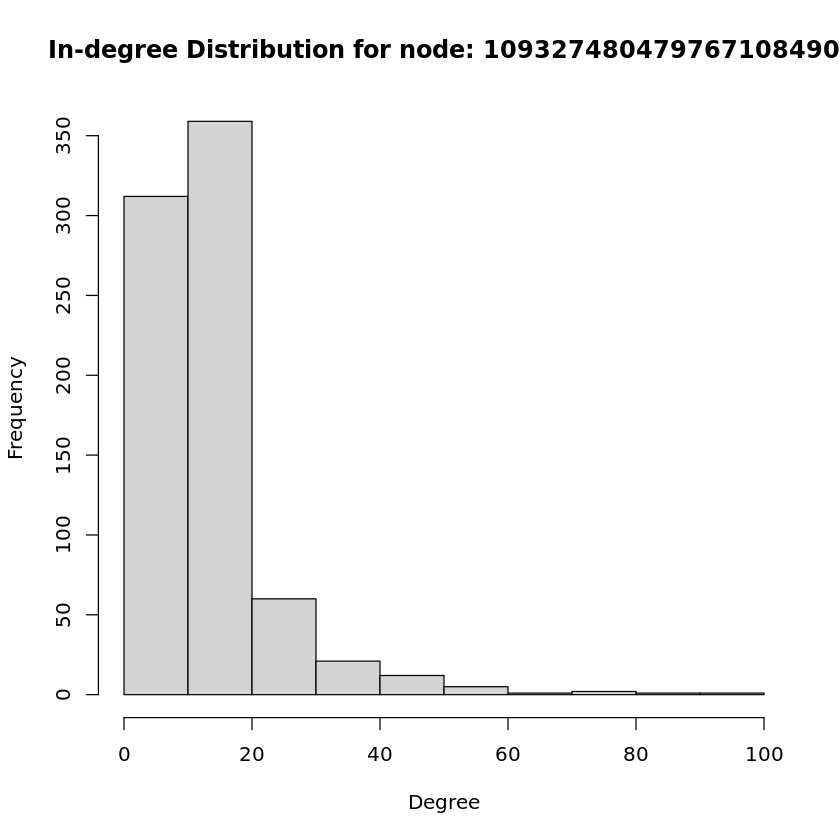

[1] "Processing Node ID: 115625564993990145546"
[1] "In-degree: mean=43.640, Variance=1020.621"


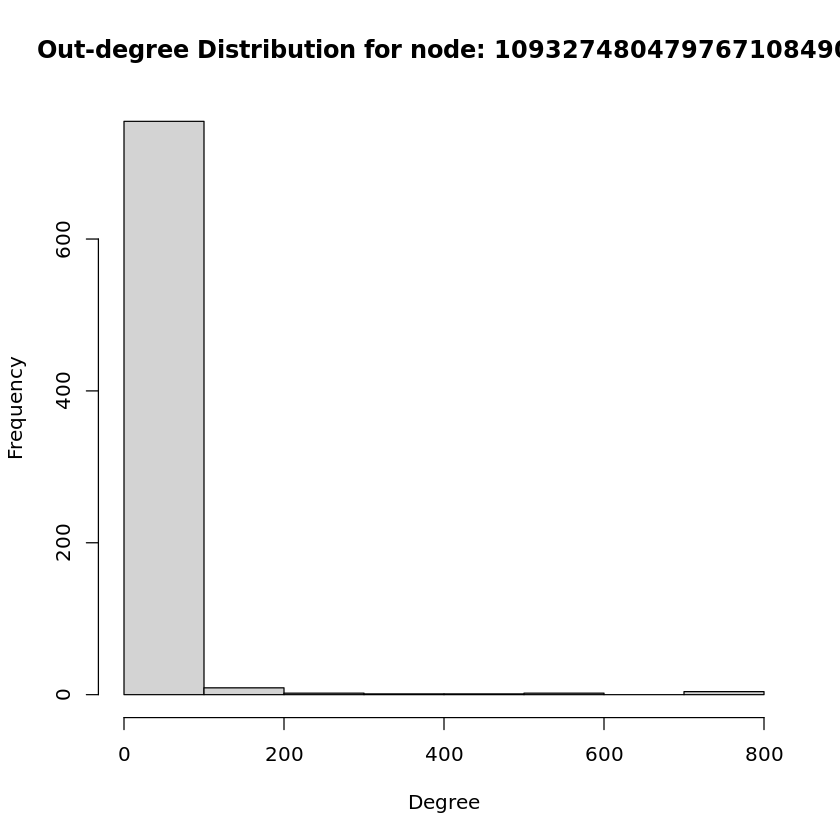

[1] "Out-degree: mean=43.640, Variance=9351.303"


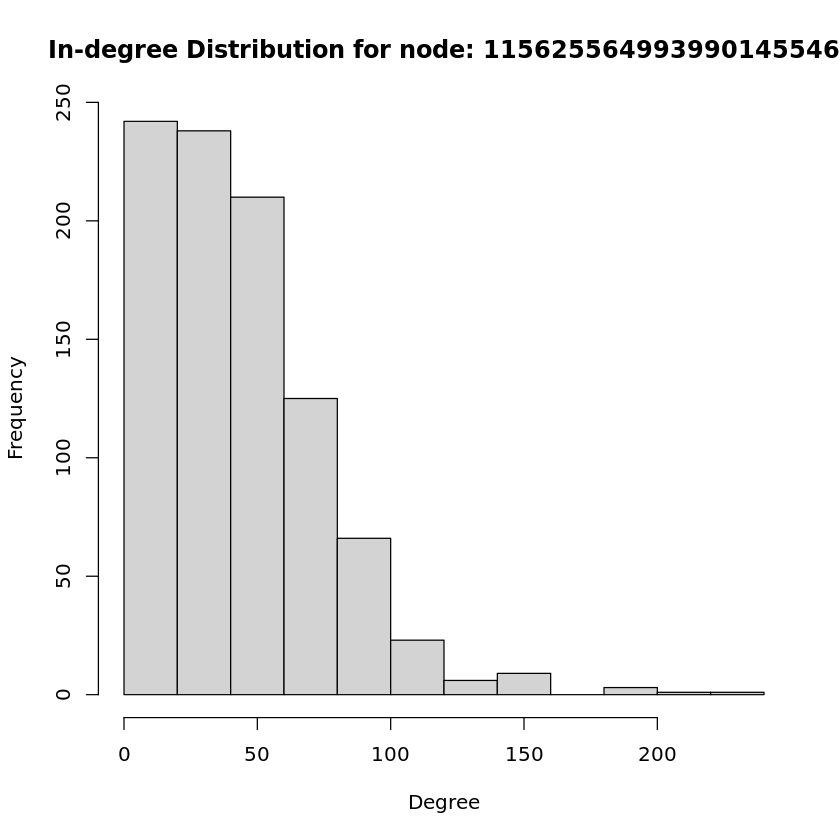

[1] "Processing Node ID: 101373961279443806744"
[1] "In-degree: mean=298.118, Variance=86408.770"


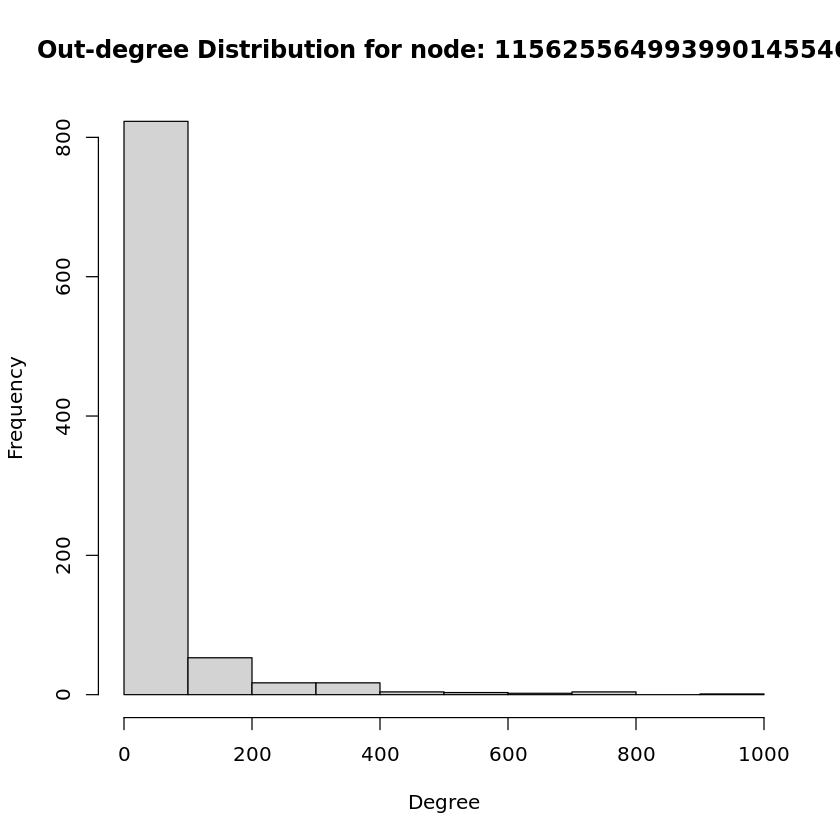

[1] "Out-degree: mean=298.118, Variance=166186.737"


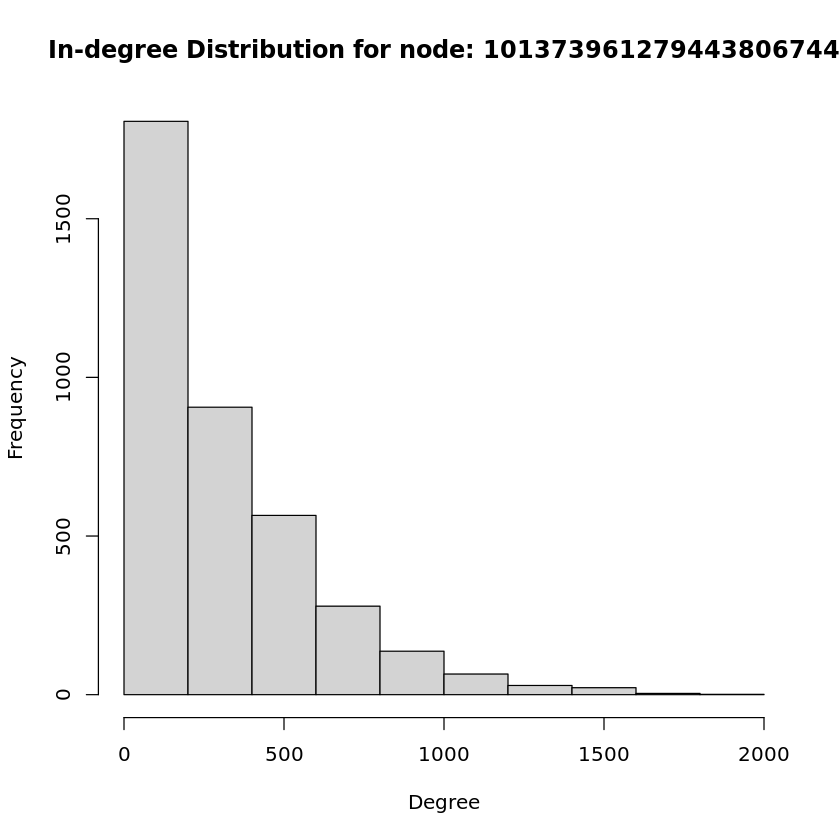

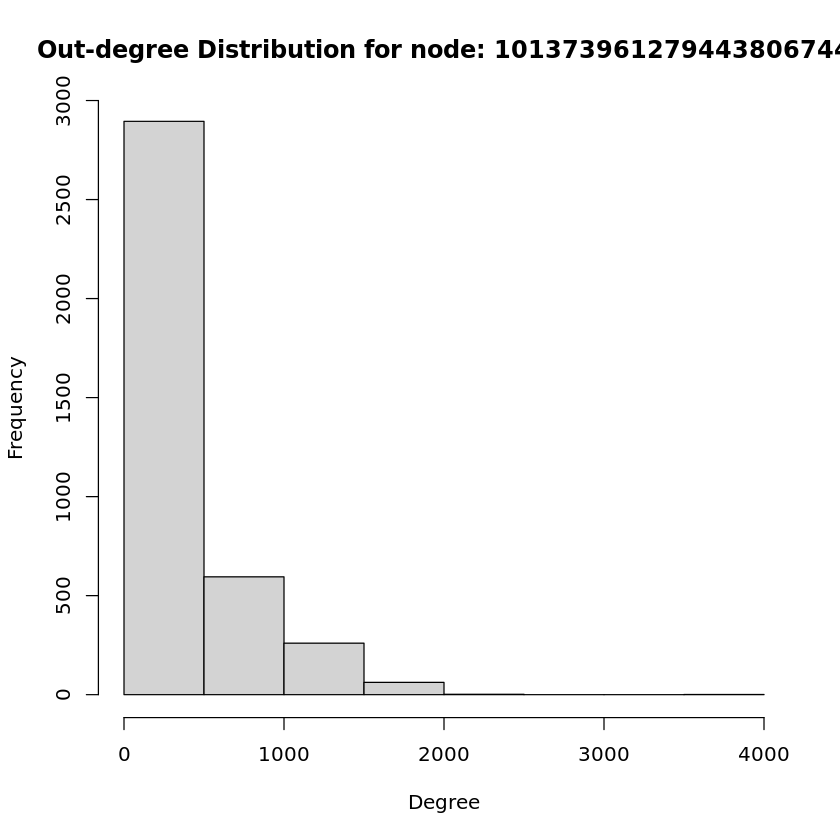

In [9]:
#19
# List of node IDs
node_ids = c("109327480479767108490", "115625564993990145546", "101373961279443806744")

# Loop through each node ID
for (node_id in node_ids) {
    print(sprintf("Processing Node ID: %s", node_id))
    
    # Construct the filename for edge data
    edge_file_path = paste("gplus/gplus/", node_id, ".edges", sep = "")
    
    # Load edge data into a data frame
    edges = read.table(edge_file_path, col.names = c("source", "target"))
    
    # Ensure columns are treated as character data
    edges$source = as.character(edges$source)
    edges$target = as.character(edges$target)
    
    # Create a graph from the edge data
    graph = graph_from_data_frame(edges, directed = TRUE)
    
    # Add the current node as a vertex
    graph = add_vertices(graph, nv = 1, name = node_id)
    
    # Find the index of the current node
    current_node_index = which(V(graph)$name == node_id)
    
    # Create edge list to connect the current node to all others
    edge_list = c()
    for (vertex_index in 1:(vcount(graph) - 1)) {
        edge_list = c(edge_list, c(current_node_index, vertex_index))
    }
    graph = add_edges(graph, edge_list)
    
    # Compute and print in-degree statistics
    in_degree_values = degree(graph, mode = "in")
    print(sprintf("In-degree: mean=%5.3f, Variance=%5.3f", mean(in_degree_values), var(in_degree_values)))
    hist(in_degree_values, main = paste("In-degree Distribution for node:", node_id), xlab = "Degree")
    
    # Compute and print out-degree statistics
    out_degree_values = degree(graph, mode = "out")
    print(sprintf("Out-degree: mean=%5.3f, Variance=%5.3f", mean(out_degree_values), var(out_degree_values)))
    hist(out_degree_values, main = paste("Out-degree Distribution for node:", node_id), xlab = "Degree")
}


[1] "Node ID 109327480479767108490 has a modularity of 0.252765"
[1] "Node ID 115625564993990145546 has a modularity of 0.319473"


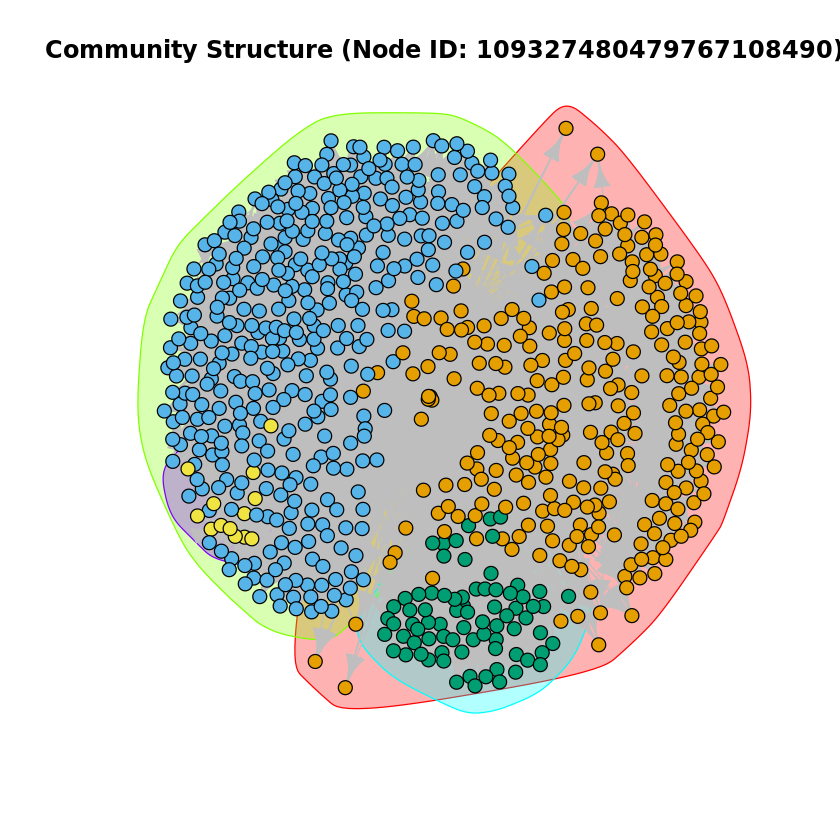

[1] "Node ID 101373961279443806744 has a modularity of 0.191090"


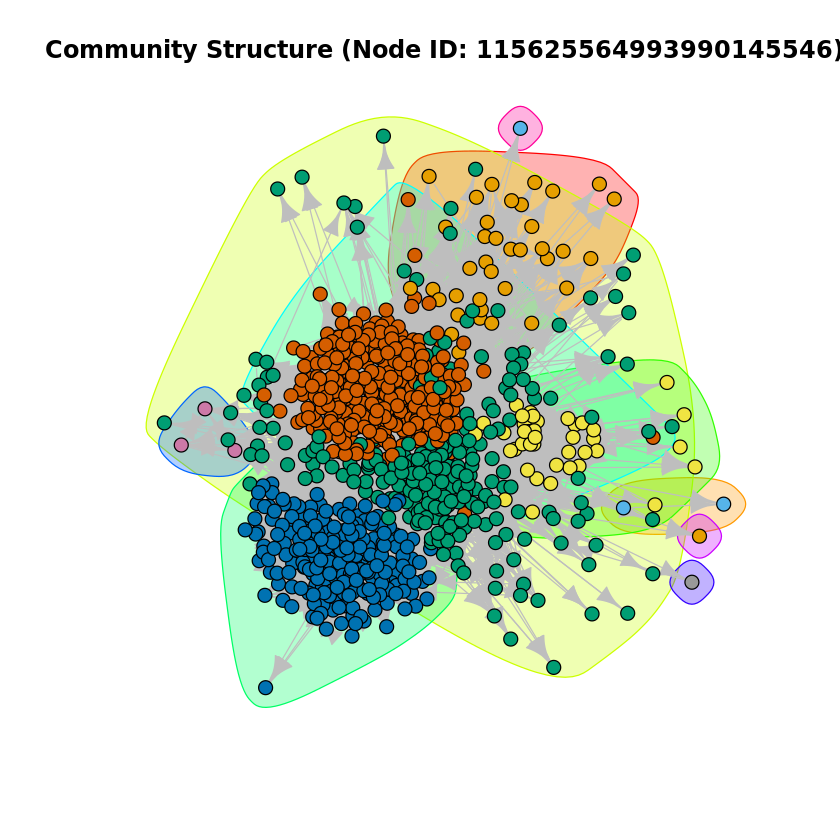

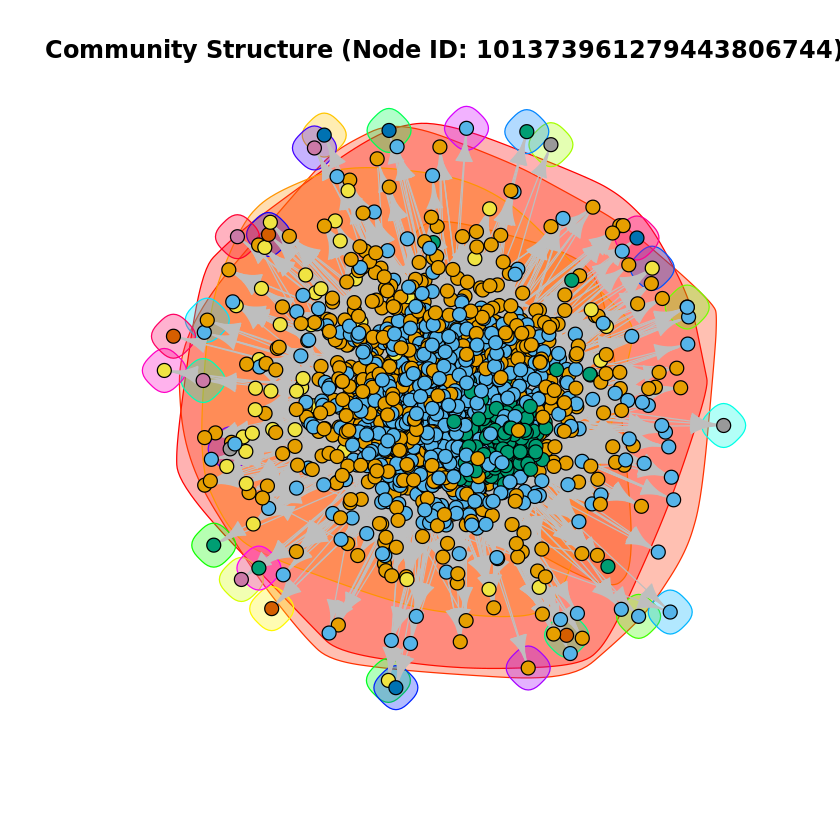

In [10]:
#20
node_ids = c("109327480479767108490", "115625564993990145546", "101373961279443806744")

# Loop over each node identifier
for (node_id in node_ids) {
    # Construct the path to the file containing edge data
    edge_data_path = paste("gplus/gplus/", node_id, ".edges", sep = "")
    
    # Load the edge data into a dataframe
    edges_dataframe = read.table(edge_data_path, col.names = c("source", "target"))
    
    # Ensure that data types are correct
    edges_dataframe$source = as.character(edges_dataframe$source)
    edges_dataframe$target = as.character(edges_dataframe$target)
    
    # Initialize graph from edges
    graph_object = graph_from_data_frame(edges_dataframe, directed = TRUE)
    graph_object = add_vertices(graph_object, nv = 1, name = node_id)
    
    # Identify the new node's index
    new_node_index = which(V(graph_object)$name == node_id)
    
    # Create edges from the new node to all existing nodes
    new_edges = c()
    for (vertex in 1:(vcount(graph_object) - 1)) {
        new_edges = c(new_edges, c(new_node_index, vertex))
    }
    graph_object = add_edges(graph_object, new_edges)
    
    # Calculate community structure using Walktrap algorithm
    community_structure = walktrap.community(graph_object)
    community_modularity = modularity(community_structure)
    print(sprintf("Node ID %s has a modularity of %2.6f", node_id, community_modularity))

    # Visualize the community structure
    plot(community_structure, graph_object, main = sprintf("Community Structure (Node ID: %s)", node_id), vertex.size = 5, vertex.label = NA, edge.color = "grey", layout = layout.fruchterman.reingold)
}


In [15]:
# Define list of node identifiers
node_ids <- c("109327480479767108490", "115625564993990145546", "101373961279443806744")

# Iterate over each node identifier
for (node in node_ids) {
    circle_data <- readLines(paste0("gplus/gplus/", node, ".circles"))
    circle_list = list()

    # Extract circle information
    for (line in 1:length(circle_data)) {
        circle_members = strsplit(circle_data[line], "\t")
        circle_list = c(circle_list, list(circle_members[[1]][-1]))
    }

    # Combine all unique circle members
    unique_members <- unique(unlist(circle_list))
    total_members <- length(unique_members)

    # Calculate entropy of circles
    entropy_circles <- 0
    for (circle in circle_list) {
        proportion = length(circle) / total_members
        entropy_circles <- entropy_circles + (proportion * log10(proportion))
    }
    entropy_circles <- -entropy_circles

    # Load graph and add node vertex
    graph <- read_graph(paste0("gplus/gplus/", node, ".edges"), format="ncol", directed=TRUE)
    graph <- add_vertices(graph, nv = 1, name = node)
    node_index <- which(V(graph)$name == node)
    
    # Connect new vertex to all existing vertices
    edge_list <- c()
    for (vertex in 1:(vcount(graph) - 1)) {
        edge_list <- c(edge_list, c(node_index, vertex))
    }
    graph <- add_edges(graph, edge_list)
    
    # Perform community detection
    community_structure <- walktrap.community(graph)

    # Compute mutual information terms
    entropy_community <- 0
    entropy_given_circles <- 0
    entropy_given_community <- 0
    for (cluster in 1:max(community_structure$membership)) {
        community_members <- V(graph)$name[which(community_structure$membership == cluster)]
        intersection_size <- length(intersect(community_members, unique_members))
        if (intersection_size != 0) {
            entropy_community <- entropy_community + (intersection_size / total_members) * log10(intersection_size / total_members)
            for (circle in circle_list) {
                common_members <- intersect(community_members, circle)
                count_common <- length(unique(common_members))
                circle_size <- length(circle)
                if (count_common != 0) {
                    entropy_given_circles <- entropy_given_circles + (count_common / total_members) * log10(count_common / intersection_size)
                    entropy_given_community <- entropy_given_community + (count_common / total_members) * log10(count_common / circle_size)
                }
            }
        }
    }
    entropy_community <- -entropy_community
    entropy_given_circles <- -entropy_given_circles
    entropy_given_community <- -entropy_given_community

    # Calculate homogeneity and completeness
    homogeneity <- 1 - (entropy_given_circles / entropy_circles)
    completeness <- 1 - (entropy_given_community / entropy_community)

    print(paste("Node", node, "Homogeneity:", homogeneity))
    print(paste("Node", node, "Completeness:", completeness))
}


[1] "Node 109327480479767108490 Homogeneity: 0.851885115440867"
[1] "Node 109327480479767108490 Completeness: 0.329873913536689"
[1] "Node 115625564993990145546 Homogeneity: 0.451890303032235"
[1] "Node 115625564993990145546 Completeness: -3.4239623491117"
[1] "Node 101373961279443806744 Homogeneity: 0.00386670698130498"
[1] "Node 101373961279443806744 Completeness: -1.5042383879479"
